In this workshop we will work on a project to construct a simulation of a gas in a 2d box. You may have seen something similar on your lectures though here our simulation will be a bit simpler.

We will be simulating an ideal gas so particles will collide with each other and the walls of the box in a perfectly elastic manner. The aim will be to simulate N particles, in a box of size L x L, given some initial conditions, namely the positions and momementa of the particles involved.

Once we have our simulation up and running we'll check the distribution of speeds and see if it corresponds to the distribution predicted by the 2d version of the Maxwell-Boltzmann distribution.

In [1]:
import numpy as np
from oo_functions import animate_trajectory, clunky_display_frame, display_particle
from oo_functions import display_trajectory, get_particles

In [2]:
class Vector(): 
    def __init__(self, i1,i2):
        self.x = i1 
        self.y = i2
    
    def __add__(self,other):
        return (Vector(self.x+other.x,self.y+other.y))

    def __sub__(self,other):
        return (Vector(self.x-other.x,self.y-other.y))

    def __mul__(self,other):
        return Vector(self.x*other,self.y*other)
    
    def __truediv__(self,other):
        return Vector(self.x/other,self.y/other)

    def __pow__(self,other):
        return Vector(self.x**other,self.y**other)
    
    def __repr__(self):
        return '{x} {y}'.format(x=self.x, y=self.y)
    def dot(self,other):
        return self.x*other.x + self.y*other.y
    
    def length(self):
        return np.sqrt(self.x**2 + self.y**2)

We're going to create two classes, a Particle class which will represent *drum roll* particles and a simulation class which will represent the total simulation and which include many instances of our particle class.

Let's start with the particle class. For our purposes the properties that define a single particle will be position momentum and radius. In the skeleton of the class below replace *pass* with code so that the particle class has position/momentum/radius attributes. We will also want a method *velocity* which will return the velocity of the particle (using the momentum and mass attributes)

In [4]:
class Particle():
    def __init__(self, position, momentum, radius=1, mass=1):
        pass
    
    def velocity(self):
        pass

In [5]:
class Particle():
    def __init__(self, position, momentum, radius=1, mass=1):
        self.position = position
        self.momentum = momentum
        self.radius = radius
        self.mass = mass
    
    def velocity(self):
        return self.momentum/self.mass

We've created some helper functions for this workshop that will help with visualisation. One function is called display_particle. In the cell below use your particle class to create a particle object and then use the display_particle function to display it. In order to initialise your particle you'll need to create two vectors one for position and one for momentum and provide your particle with a radius and a mass.

In [5]:
position=Vector(0,0)
momentum=Vector(0,1)
p=Particle(position,momentum,1)
display_particle(p)

A plot showing your particle should have popped up. Bask in the glory of the particle you have created.

Ok now we can create particles but they aren't doing too much let's try generate a trajectory. As our particle is a free particle experiencing no forces the momentum will not change with time. The position however will change. In a small amount of time dt the position will change via:
$$S_{t+1}=S_{t}+V.dt$$

To generate a trajectory we are going to run our simulation for a certain number of time steps, during each time step we will use the velocity to update the position and then we'll record the position in a list.

Write a for loop which during each iteration uses the particle velocity and the small amount time dt to update the position of the particle. You'll also want to add the position to the trajectory list so that we have a record of where the particle has been.

In [6]:
no_steps = 1000
dt = 0.01

particle_trajectory = []
for step in range(no_steps):
    pass

In [7]:
no_steps = 1000
dt = 0.01

particle_trajectory = []
for step in range(no_steps):
    p.position = p.position + p.velocity() * dt
    particle_trajectory.append(p.position)

Use the display_trajectory function on the positions list to view the motion of your particle

In [8]:
display_trajectory(particle_trajectory)

Great! We're going to take a step sideways now and introduce our main simulation class. The code you wrote above calculated the position of a single particle for multiple time steps.

This time we're going to have many particles but we're only going to calculate their position for a single time step. Below is a skeleton for our simulation class, it is initialised with a list of particles and a number dt. It includes a method *step* this method is where the action takes place it should loop over every particle and update the particle's position using it's momementum and the small amount time dt.

In [7]:
class Simulation():
    def __init__(self, particles, dt):
        pass
    
    def step(self):
        pass

In [8]:
class Simulation():
    def __init__(self, particles, dt):
        self.particles = particles
        self.dt = dt
    
    def step(self):
        for particle in particles:
            particle.position = particle.position + particle.velocity() * self.dt

Test your simulation class using the code below (we're printing out the y coordinate of the first particle at the start of the simulation and after we have updated the positions)

In [9]:
particles = [Particle(Vector(0.5,0),Vector(0,1),1,1),
             Particle(Vector(0.5,1),Vector(0,-1),1,1),
             Particle(Vector(0,0), Vector(0.5,0.5),1,1)]

s=Simulation(particles, 1)

print(s.particles[0].position.y)
s.step()
print(s.particles[0].position.y)
s.step()
print(s.particles[0].position.y)

0
1.0
2.0


We also want to record the positions so we can have a look at the trajectories our particles have taken during the simulation.

In the cell below is another simulation class skeleton, you'll want to fill out the __init__ and step methods as before but this time we've also got a record_positions method. This method should loop over all the particles and append their position to the positions list. Once done is should append the positions list to the trajectory attribute. You'll want to call the record_positions method at the end of step method so that every time we update the particles we record where they are. 

In [10]:
class Simulation():
    def __init__(self, particles, dt):
        self.trajectory = []
    
    def step(self):
        pass
    
    def record_positions(self):
        positions = []

In [7]:
class Simulation():
    def __init__(self, particles, dt):
        self.particles = particles
        self.dt = dt
        
        self.trajectory = []
    
    def step(self):
        for particle in particles:
            particle.position = particle.position + particle.velocity() * self.dt
        self.record_positions()
        
    def record_positions(self):
        positions = []
        
        for particle in particles:
            positions.append(particle.position)
        self.trajectory.append(positions)

Test your code using the cell below:

In [8]:
particles = [Particle(Vector(10,0),Vector(0,0.75),1,1),
             Particle(Vector(50,10),Vector(0,0.5),1,1),
             Particle(Vector(0,0), Vector(0.5,0.75),1,1)]

no_steps = 500

s=Simulation(particles, .1)
for i in range(no_steps):
    s.step()
    
animate_trajectory(s)

Rather than manually defining particles we've constructed a helper function *get_particles* that generate an initial collection of particles. To use this function you need to specify the number of particles you want, the size of the box they are in and optionally a momentum to give all the particles (if no momentum is supplied the function will randomly assign momenta)

Use this function to simulation 100 particles for 500 time steps.

In [2]:
from oo_functions import get_particles

pass

In [20]:
from oo_functions import get_particles

particles = get_particles(200, 100)
s=Simulation(particles, .1)

for i in range(500):
    s.step()
    
animate_trajectory(s)

Ok we're making great progress but our simulation faces two problems:

   * Our particles pass through the boundaries of our box
   * Our particles pass through each other.
   
Let's focus on the boundaries problem to begin with. First we'll create a simple test involving particles going through the boundary. That way when we change our code we can check it's behaving the way we want.

In [60]:
def test_box():
    box_length = 100
    no_steps = 300

    p1 = Particle(position = Vector(10,50), momentum=Vector(-1,0),radius=1,mass=1)
    p2 = Particle(position = Vector(50,90), momentum=Vector(0,1) ,radius=1,mass=1)
    p3 = Particle(position = Vector(50,10), momentum=Vector(0,-1),radius=1,mass=1)
    p4 = Particle(position = Vector(90,50), momentum=Vector(1,0) ,radius=1,mass=1)

    test_case = [p1,p2,p3,p4]
    s=Simulation(particles=test_case,box_length=100,dt=0.05)

    for i in range(500):
        s.step()
    animate_trajectory(s,loop=True)
    
test_box()

Let's update our simulation class so that instead of passing through our box they bounce off the edges. Our simulation class will need to be initialised with an additional attribute: *box_length* and it will need an additional method *apply_box_collisions*.

Let's think about what this method should do. At the moment our particles momenta remain unaltered no matter what happens. But we would like the momentum of a particle along the x-axis to reverse if it goes past the sides of our box, likewise we would like the momentum of a particle along the y-axis to reverse if it goes past the top or the bottom of our box.

Try implementing an apply_box_collisions method in the skeleton below. This method will recieve as it's argument a particle and then it will check whether that particle is past the boundaries of the box and if it is change it's momentum accordingly.

We'll then add in a call to apply_box_collisions in our step method that loops over all the particles.

In [ ]:
class Simulation():
    def __init__(self, particles, box_length, dt):        
        self.trajectory = []
        
        pass
        
    def apply_box_collisions(self, particle):
        pass
    
    def step(self):
        pass
    
    def record_positions(self):
        positions = []
        
        pass

In [56]:
class Simulation():
    def __init__(self, particles, dt, box_length):
        self.particles = particles
        self.dt = dt
        self.box_length = box_length
        
        self.trajectory = []
        
    def apply_box_collisions(self, particle):
        if particle.position.x <0 or particle.position.x > self.box_length:
            particle.momentum.x *= -1.0

        if particle.position.y <0 or particle.position.y > self.box_length:
            particle.momentum.y *= -1.0
            
    def step(self):
        for particle in self.particles:
            particle.position = particle.position + particle.velocity() * self.dt
            self.apply_box_collisions(particle)
        self.record_positions()
        
    def record_positions(self):
        positions = []
        
        for particle in self.particles:
            positions.append(particle.position)
        self.trajectory.append(positions)

Test your simulation class by executing the cell below

In [57]:
test_box()

In [ ]:
class Simulation():
    def __init__(self, particles, dt, box_length):
        self.particles = particles
        self.dt = dt
        self.box_length = box_length
        
        self.trajectory = []
        
    def apply_box_collisions(self, particle):
        if particle.position.x <0 or particle.position.x > self.box_length:
            particle.momentum.x *= -1.0

        if particle.position.y <0 or particle.position.y > self.box_length:
            particle.momentum.y *= -1.0
            
    def step(self):
        for particle in self.particles:
            particle.position = particle.position + particle.velocity() * self.dt
            self.apply_box_collisions(particle)
        self.record_positions()
        
    def record_positions(self):
        positions = []
        
        for particle in self.particles:
            positions.append(particle.position)
        self.trajectory.append(positions)

Ok the final problem and the most challenging is implementing interparticle collisions. First we'll create a couple of test cases:

In [65]:
def test_1d_collision():
    box_length = 100
    no_steps = 300

    p1 = Particle(position = Vector(10,10), momentum=Vector(1,0),radius=1,mass=1)
    p2 = Particle(position = Vector(20,10), momentum=Vector(0,0) ,radius=1,mass=1)
    
    test_case = [p1,p2]
    s=Simulation(particles=test_case,box_length=100,dt=0.05)

    for i in range(500):
        s.step()
    animate_trajectory(s,loop=True)

test_1d_collision()

In [ ]:
def test_2d_collision():
    box_length = 100
    no_steps = 300

    p1 = Particle(position = Vector(10,10), momentum=Vector(1,0.5),radius=1,mass=1)
    p2 = Particle(position = Vector(20,15), momentum=Vector(0,0) ,radius=1,mass=1)
    
    test_case = [p1,p2]
    s=Simulation(particles=test_case,box_length=100,dt=0.05)

    for i in range(500):
        s.step()
    animate_trajectory(s,loop=True)
    
test_2d_collision()

One thing that will make our life easier is if we add another method to our particle class. In order to check whether two particles are going to collide we need to check whether they overlap. So we'll want to add an overlap method to our Particle class, this method will recieve as it's second argument another particle (as always the first argument a method recieves is always self). Our method will then return True if the distance between this other particle and its self is less than the sum of the two particle's radii. Fill out the class skeleton below:

In [16]:
class Particle():
    def __init__(self, position, momentum, radius, mass):
        pass
        
    def velocity(self):
        pass
    
    def overlap(self, other_particle):
        pass

In [3]:
class Particle():
    def __init__(self, position, momentum, radius, mass):
        self.position = position
        self.momentum = momentum
        self.radius = radius
        self.mass = mass
        
    def velocity(self):
        return self.momentum/self.mass
    
    def overlap(self, other):
        displacement = self.position - other.position
        return displacement.length() < (self.radius + other.radius)

In the cell below create some particle variables and see if the overlap method behaves the way you expect it to.

In [29]:
pos_1 = Vector(0,0)
mom_1 = Vector(1,0)

pos_2 = Vector(5,0)
mom_2 = Vector(0,0)

pos_3 = Vector(1,0)
mom_3 = Vector(0,0)


p1 = Particle(pos_1,mom_1,1,1)
p2 = Particle(pos_2,mom_2,1,1)
p3 = Particle(pos_3,mom_3,1,1)

print(p1.overlap(p2))
print(p1.overlap(p3))

False
True


Ok so now we can think about the collisions themselves. We're going to focus on perfectly elastic collisions and to start with we're going to make two additional simplifications: 

* We're going to pretend that we're dealing with 1 dimensional particles.
* We're going to pretend that the masses of both particles are equal. 

Under these conditions the result of an elastic collision is that the momenta of the two particles simply swap over after the collision as illustrated from the following [wiki](https://en.wikipedia.org/wiki/Elastic_collision) animation:

<img src=https://upload.wikimedia.org/wikipedia/commons/c/c6/Elastischer_sto%C3%9F.gif><img>

I.e.: 
$$p_{1}: mv_{1} \rightarrow mv_2$$ 
$$p_{2}: mv_{2} \rightarrow mv_1$$ 

Our particles are 2d in that they have x and y components for both position and momentum, but if we make sure all the particles we're dealing with have the same y position and have 0 y momenta then they are effectively behaving like 1d particles.

Add a method *apply_particle_collisions*  that recieves as its arguments two particles and if they overlap alters their momentum along the x-axis in line with an elastic collision.

In [ ]:

class Simulation():
    def __init__(self, particles, dt, box_length):
        self.trajectory = []
        
        pass
    
    def apply_particle_collisions(self, particle1, particle2):
        pass
    
    def apply_box_collisions(self, particle):
        pass
    
    def step(self):
        pass
    
    def record_positions(self):
        positions = []
        
        pass

In [66]:
class Simulation():
    def __init__(self, particles, dt, box_length):
        self.particles = particles
        self.dt = dt
        self.box_length = box_length
        
        self.trajectory = []
    
    def apply_particle_collisions(self, particle1, particle2):
        if particle1.overlap(particle2):
            p_x1 = particle1.momentum.x
            p_x2 = particle2.momentum.x
            
            particle1.momentum.x = p_x2
            particle2.momentum.x = p_x1
    
    def apply_box_collisions(self, particle):
        if particle.position.x <0 or particle.position.x > self.box_length:
            particle.momentum.x *= -1.0

        if particle.position.y <0 or particle.position.y > self.box_length:
            particle.momentum.y *= -1.0
            
    def step(self):
        for particle in self.particles:
            particle.position = particle.position + particle.velocity() * self.dt
            self.apply_box_collisions(particle)
        self.record_positions()
        
    def record_positions(self):
        positions = []
        
        for particle in self.particles:
            positions.append(particle.position)
        self.trajectory.append(positions)

In the cell below create a few particle objects and check that your method behaves the way you expect it to.

Now we want to add in applying collisions to our step method. But to do that we need to loop over all pairs of particles. Note that we want to avoid colliding particle i with particle j and then also particle j with particle i because if we collide the same particles twice we will end up swapping their momenta back again and undoing the collision!

There are several different ways of doing this but perhaps the easiest is to use the function **combinations** from the itertools library. See example below:

In [68]:
from itertools import combinations

example_list = [1,2,3,4,5]

for p1,p2 in combinations(example_list,2):
    print(p1,p2)

1 2
1 3
1 4
1 5
2 3
2 4
2 5
3 4
3 5
4 5


Amend your step method so that it calls apply_particle_collision on all pairs of particles.

In [ ]:

class Simulation():
    def __init__(self, particles, dt, box_length):
        self.trajectory = []
        
        pass
    
    def apply_particle_collisions(self, particle1, particle2):
        pass
    
    def apply_box_collisions(self, particle):
        pass
    
    def step(self):
        pass
    
    def record_positions(self):
        positions = []
        
        pass

In [72]:
class Simulation():
    def __init__(self, particles, dt, box_length):
        self.particles = particles
        self.dt = dt
        self.box_length = box_length
        
        self.trajectory = []
    
    def apply_particle_collision(self, particle1, particle2):
        if particle1.overlap(particle2):
            p_x1 = particle1.momentum.x
            p_x2 = particle2.momentum.x
            
            particle1.momentum.x = p_x2
            particle2.momentum.x = p_x1
    
    def apply_box_collisions(self, particle):
        if particle.position.x <0 or particle.position.x > self.box_length:
            particle.momentum.x *= -1.0

        if particle.position.y <0 or particle.position.y > self.box_length:
            particle.momentum.y *= -1.0
            
    def step(self):
        for particle in self.particles:
            particle.position = particle.position + particle.velocity() * self.dt
            self.apply_box_collisions(particle)
            
        for particle1, particle2 in combinations(self.particles, 2):
            self.apply_particle_collision(particle1, particle2)
            
        self.record_positions()
        
    def record_positions(self):
        positions = []
        
        for particle in self.particles:
            positions.append(particle.position)
        self.trajectory.append(positions)

Test your solution below:

In [75]:
%%prun
test_1d_collision()

Let's move on to 2d collisions! In order to treat our 2d case what we want to do is to decompose the momenta of the particles into two components.

One component along the direction of the displacement vector between the two particles. We'll call this the *normal axis* and the remainder which will be along the direction at 90 degrees to the normal axis, we'll cal this the *tangent axis*. Once we have decomposed the momenta in this fashion we can leave the tangent component unchanged as the collision has no effect on it and use our formula for the 1d collision on the components along the normal axis. As we have picked the simplified case this means all that happens is that that the two normal components swap over.

To make that a bit clearer let's look at the following animation from [wiki](https://en.wikipedia.org/wiki/Elastic_collision):

<img src=https://upload.wikimedia.org/wikipedia/commons/2/2c/Elastischer_sto%C3%9F_2D.gif></img>

What you are seeing is one particle in motion and another at rest. At the point where the two particles overlap, the animation displays the normal and tangent axes (the perpendicular black lines). The momentum of the moving particle (displayed as a red arrow) is decomposed into two components one along the normal axis and the other at right angles to this axis (these are displayed as two blue arrows).

The stationary particle has no momentum which means that both components are initially zero. 

After the collision the two particles swap normal components.

For the initially moving particle, the normal component becomes zero, leaving only its initial tangent component contributing to its final momentum. 

For the initially stationary particle, the initial tangent component is zero so the final momentum is equal to the normal component of initially moving particle prior to collision.

In [ ]:

class Simulation():
    def __init__(self, particles, dt, box_length):
        self.trajectory = []
        
        pass
    
    def apply_particle_collisions(self, particle1, particle2):
        pass
    
    def apply_box_collisions(self, particle):
        pass
    
    def step(self):
        pass
    
    def record_positions(self):
        positions = []
        
        pass

In [ ]:
class Simulation():
    def __init__(self, particles, dt, box_length):
        self.particles = particles
        self.dt = dt
        self.box_length = box_length
        
        self.trajectory = []
    
    def apply_particle_collisions(self, particle):
        for other_particle in self.particles:
            if particle.overlap(other_particle):     
                p_xmomentum = particle.momentum.x 
                op_xmomentum = other_particle.momentum.x
                
                particle.momentum.x = op_xmomentum
                other_particle.momentum.x = p_xmomentum
                
    def apply_box_collisions(self, particle):
        if particle.position.x <0 or particle.position.x > self.box_length:
            particle.momentum.x *= -1.0

        if particle.position.y <0 or particle.position.y > self.box_length:
            particle.momentum.y *= -1.0
            
    def step(self):
        for particle in self.particles:
            particle.position = particle.position + particle.velocity() * self.dt
            self.apply_box_collisions(particle)
        
        for particle1, particle2 in combinations(self.particles):
            self.apply_particle_collisions(particle1,particle2)
        self.record_positions()
        
    def record_positions(self):
        positions = []
        
        for particle in self.particles:
            positions.append(particle.position)
        self.trajectory.append(positions)

In [ ]:
class Simulation():
    def __init__(self, particles, dt, box_length):
        pass
        
        self.trajectory = []
    
    def apply_particle_collisions(self, particle):
        pass
    
    def apply_box_collisions(self, particle):
        pass
    
    def step(self):
        pass
    
    def record_positions(self):
        positions = []
        
        pass

In [31]:
class Simulation():
    def __init__(self, particles, dt, box_length):
        self.particles = particles
        self.dt = dt
        self.box_length = box_length
        
        self.trajectory = []
    
    def apply_particle_collisions(self, particle):
        for other_particle in self.particles:
            if particle.overlap(other_particle):
                #define unit normal
                normal = other_particle.position - particle.position
                unit_normal = normal / normal.length()

                #project particle momenta onto normal and tangent axes
                particle_n_mv = unit_normal * particle.momentum.dot(unit_normal)
                particle_t_mv = particle.momentum - particle_n_mv
                
                other_particle_n_mv = unit_normal * other_particle.momentum.dot(unit_normal)
                other_particle_t_mv = other_particle.momentum - other_particle_n_mv
                
                #if they are already moving away from each other bail out
                delta_momentum = other_particle.momentum - particle.momentum
                if delta_momentum.dot(unit_normal) < 0:

                    #otherwise define new normal momenta
                    particle_new_n_mv = (particle_n_mv*(particle.mass - other_particle.mass) + \
                                         other_particle_n_mv*2) / (particle.mass + other_particle.mass)

                    other_particle_new_n_mv = (other_particle_n_mv*(other_particle.mass - particle.mass) + \
                                               particle_n_mv*2) / (other_particle.mass + particle.mass)

                    print('old:{mv1}, new:{mv2}'.format(mv1=particle_n_mv, mv2=particle_new_n_mv))

                    #update particle momenta
                    particle.momenta = particle_new_n_mv + particle_t_mv
                    other_particle.momenta = other_particle_new_n_mv + other_particle_t_mv
                            
    def apply_box_collisions(self, particle):
        if particle.position.x <0 or particle.position.x > self.box_length:
            particle.momentum.x *= -1.0

        if particle.position.y <0 or particle.position.y > self.box_length:
            particle.momentum.y *= -1.0
            
    def step(self):
        for i, particle in enumerate(self.particles):
            particle.position = particle.position + particle.velocity() * self.dt
            self.apply_box_collisions(particle)
            self.apply_particle_collisions(i,particle)
            
        self.record_positions()
        
    def record_positions(self):
        positions = []
        
        for particle in self.particles:
            positions.append(particle.position)
        self.trajectory.append(positions)

In [32]:
box_length = 100
no_steps = 150

p1 = Particle(position = Vector(20,20), momentum=Vector(0,1),radius=1,mass=1)
p2 = Particle(position = Vector(20,25), momentum=Vector(0,0),radius=1,mass=1)
p3 = Particle(position = Vector(50,20), momentum=Vector(1,1),radius=1,mass=1)
p4 = Particle(position = Vector(55,25), momentum=Vector(0,0),radius=1,mass=1)
p5 = Particle(position = Vector(20,55), momentum=Vector(1,0),radius=1,mass=1)
p6 = Particle(position = Vector(25,50), momentum=Vector(0,1),radius=1,mass=1)
p7 = Particle(position = Vector(50,50), momentum=Vector(1,0),radius=1,mass=1)
p8 = Particle(position = Vector(55,50), momentum=Vector(0,0),radius=1,mass=1)

test_case = [p1,p2,p3,p4,p5,p6,p7,p8]
s=Simulation(particles=test_case,box_length=100,dt=0.1)

for i in range(no_steps):
    s.step()
animate_trajectory(s,loop=False)

TypeError: apply_particle_collisions() takes 2 positional arguments but 3 were given

In [21]:
%load_ext Cython

In [35]:
%%cython
from vector import Vector
class Particle():
    def __init__(self, position, momentum, radius, mass):
        self.position = position
        self.momentum = momentum
        self.radius = radius
        self.mass = mass
        
    def velocity(self):
        return self.momentum/self.mass
    
    def overlap(self, other):
        displacement = self.position - other.position
        return displacement.length() < (self.radius + other.radius)

class Simulation():
    def __init__(self, particles, dt, box_length):
        self.box_length = box_length
        self.no_particles = len(particles)
        self.dt=dt
        self.particles = particles
        
        self.trajectory = []
    
    def apply_box_collisions(self, particle):
        if (particle.position.x <0 and particle.momentum.x <0) or (particle.position.x > self.box_length and particle.momentum.x >0):
            particle.momentum.x *= -1.0

        if (particle.position.y <0 and particle.momentum.y <0) or (particle.position.y > self.box_length and particle.momentum.y >0):
            particle.momentum.y *= -1.0
           
    def apply_particle_collisions(self, particle, i):
        for j,other_particle in enumerate(self.particles):
            if j > i and particle.overlap(other_particle):
                delta_position = other_particle.position - particle.position
                collision_axis = delta_position / delta_position.length()

                particle_axis_momentum = collision_axis * particle.momentum.dot(collision_axis)
                other_particle_axis_momentum = collision_axis * other_particle.momentum.dot(collision_axis)
                
                #are they moving towards each other?
                delta_momentum = other_particle.momentum - particle.momentum
                if delta_momentum.dot(collision_axis) <= 0:
                    particle.momentum = particle.momentum - particle_axis_momentum + other_particle_axis_momentum
                    other_particle.momentum = other_particle.momentum - other_particle_axis_momentum + particle_axis_momentum

    def step(self):
        for i,particle in enumerate(self.particles):
            particle.position += (particle.momentum/particle.mass)*self.dt
            self.apply_box_collisions(particle)
            self.apply_particle_collisions(particle, i)
        self.trajectory.append([p.position for p in self.particles])
        
    def simulate(self, no_steps):
        for i in range(no_steps):
            self.step()

In [36]:
%%timeit
particles = get_particles(200, 100)
s=Simulation(particles, 0.5,100)
s.simulate(500) 

1 loops, best of 3: 30.9 s per loop


In [24]:
animate_trajectory(s)

In [ ]:
class Simulation():
    def __init__(self, particles, dt):        
        self.trajectory = []
        
        pass
        
    def apply_box_collisions(self, particle):
        pass
    
    def apply_particle_collisions(self, particle, i):
        pass
    
    def step(self):
        pass
    
    def record_positions(self):
        positions = []
        
        pass

In [24]:
class Simulation():
    def __init__(self, particles, dt):
        self.particles = particles
        self.dt = dt
        
        self.trajectory = []
        
    def apply_box_collisions(self, particle):
        if (particle.position.x <0 and particle.momentum.x <0) or (particle.position.x > self.box_length and particle.momentum.x >0):
            particle.momentum.x *= -1.0

        if (particle.position.y <0 and particle.momentum.y <0) or (particle.position.y > self.box_length and particle.momentum.y >0):
            particle.momentum.y *= -1.0
    
    def apply_particle_collisions(self, particle, i):
        for j,other_particle in enumerate(self.particles):
            if j > i and particle.overlap(other_particle):
                delta_position = other_particle.position - particle.position
                collision_axis = delta_position / delta_position.length()

                particle_axis_momentum = collision_axis * particle.momentum.dot(collision_axis)
                other_particle_axis_momentum = collision_axis * other_particle.momentum.dot(collision_axis)
                
                #are they moving towards each other?
                delta_momentum = other_particle.momentum - particle.momentum
                if delta_momentum.dot(collision_axis) <= 0:
                    particle.momentum = particle.momentum - particle_axis_momentum + other_particle_axis_momentum
                    other_particle.momentum = other_particle.momentum - other_particle_axis_momentum + particle_axis_momentum

    def step(self):
        for particle in particles:
            particle.position = particle.position + particle.velocity() * self.dt
            self.apply_box_collisions(particle)
        self.record_positions()
        
    def record_positions(self):
        positions = []
        
        for particle in particles:
            positions.append(particle.position)
        self.trajectory.append(positions)

In [ ]:
box_length = 100
no_steps = 500

p1 = Particle(position = Vector(20,20), momentum=Vector(0,1),radius=1,mass=1)
p2 = Particle(position = Vector(20,25), momentum=Vector(0,0),radius=1,mass=1)

p3 = Particle(position = Vector(50,20), momentum=Vector(1,1),radius=1,mass=1)
p4 = Particle(position = Vector(55,25), momentum=Vector(0,0),radius=1,mass=1)

p5 = Particle(position = Vector(20,55), momentum=Vector(1,0),radius=1,mass=1)
p6 = Particle(position = Vector(25,50), momentum=Vector(0,1),radius=1,mass=1)

p7 = Particle(position = Vector(50,50), momentum=Vector(1,0),radius=1,mass=1)
p8 = Particle(position = Vector(55,50), momentum=Vector(0,0),radius=1,mass=1)

test_case = [p1,p2,p3,p4,p5,p6,p7,p8]
s=Simulation(particles=test_case,box_length=100,dt=0.1)

for i in range(500):
    s.step()
animate_trajectory(s,loop=True)

In [30]:
sim_case = []

box_length = 100
no_steps = 1000
no_particles = 200

for i in range(no_particles):
    x = np.random.random()*box_length
    y = np.random.random()*box_length

    mx = 0.5 * box_length*3
    my = 0.5 * box_length*3

    position_vector = Vector(x,y)
    momentum_vector = Vector(mx,my)

    p = Particle(position=position_vector, momentum=momentum_vector,radius=2.,mass=1.)
    sim_case.append(p)

s=Simulation(no_particles=no_particles,box_length=box_length,no_steps=no_steps,dt=0.001, particles=sim_case)

In [32]:
%%prun
for i in range(no_steps):
    s.step()
    #clunky_display_frame(s)

In [50]:
animate_trajectory(s)

AttributeError: 'Simulation' object has no attribute 'box_length'

In [10]:
box_length = 100
no_steps = 500

p1 = Particle(position = Vector(20,20), momentum=Vector(0,100),radius=1,mass=1)
p2 = Particle(position = Vector(20,25), momentum=Vector(0,0),radius=1,mass=1)

p3 = Particle(position = Vector(50,20), momentum=Vector(100,100),radius=1,mass=1)
p4 = Particle(position = Vector(55,25), momentum=Vector(0,0),radius=1,mass=1)

p5 = Particle(position = Vector(20,55), momentum=Vector(100,0),radius=1,mass=1)
p6 = Particle(position = Vector(25,50), momentum=Vector(0,100),radius=1,mass=1)

p7 = Particle(position = Vector(50,50), momentum=Vector(100,0),radius=1,mass=1)
p8 = Particle(position = Vector(55,50), momentum=Vector(0,0),radius=1,mass=1)

test_case = [p1,p2,p3,p4,p5,p6,p7,p8]
s=Simulation(no_particles=8,box_length=100,no_steps=no_steps,dt=0.0002,particles=test_case)
s.simulate()
animate_trajectory(s,loop=True)

In [13]:
s.display_final_speeds(30)

AttributeError: 'Simulation' object has no attribute 'display_final_speeds'

<IPython.core.display.Javascript object>


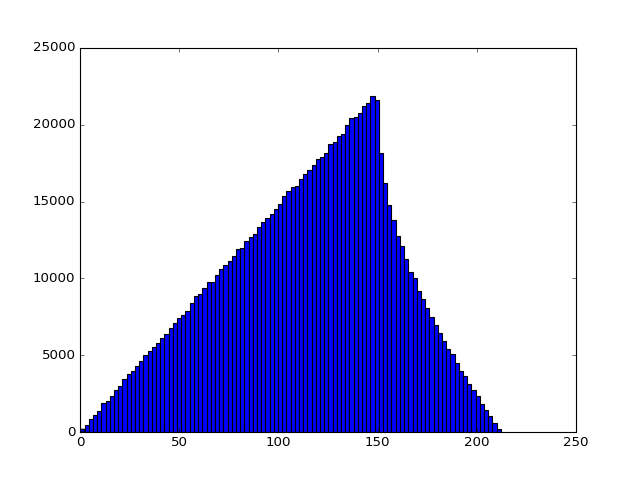

In [153]:
#what distribution do we start with?

test_vs = [(np.random.random(2)-0.5) * 100*3 for _ in range(1000000)]
test_s = [np.linalg.norm(v) for v in test_vs]

plt.figure()
plt.hist(test_s,bins=100)
plt.show()

<IPython.core.display.Javascript object>


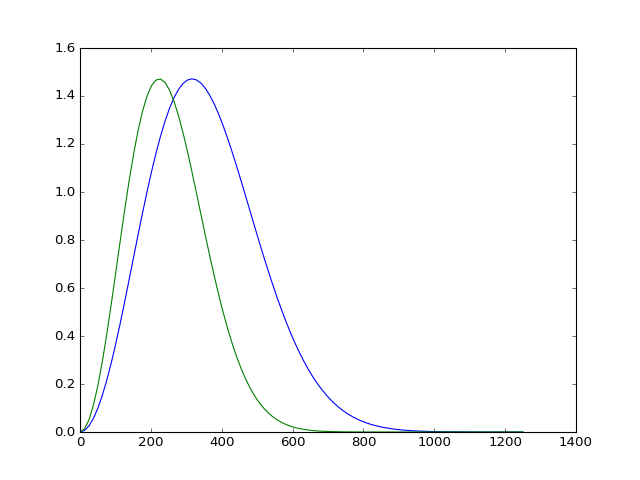

In [144]:
from scipy.stats import maxwell

plt.figure()
x = np.linspace(0,1250,100)
#scale = sqrt(kT/m)
#k/m for neon ~500 
#@~300k scale ~= 387
# 2500 ms^-1 ~= 350 x
# 1x = 7.5 ms^-1
# radius = 15m!
# neon radius 

##2d maxwell scale = m/2kt
# neon = 1e-5
maxwell_2d = lambda v,a: 4*np.pi*v**2*(a/np.pi)*np.e**(-a*v**2)
#plt.plot(x,maxwell.pdf(x,scale=387))
plt.plot(x,maxwell_2d(x,1e-5))
plt.plot(x,maxwell_2d(x,2e-5))

plt.show()

##doubling mass -> peak shrinks by 33%
##same seen in simulation! :)

In [ ]:
plt.plot(*zip(*s.positions[10]),marker='o', linestyle='', markersize=15)
plt.show()

In [ ]:
np.array(zip(*s.positions[0])) - np.array(s.positions[0]).T

In [ ]:


class Test(object):   
    def __init__(self):
        pass
    
    def anim(self):
        def update_line(num, data, line):
            line.set_data(data[..., :num])
            return line,
        
        fig = plt.figure()

        data = np.random.rand(2, 25)
        l, = plt.plot([], [], linestyle='', marker='o')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.xlabel('x')
        plt.title('test')
        line_ani = animation.FuncAnimation(fig, update_line, 25, fargs=(data, l),
                                           interval=50, blit=True)
        return line_ani
    
    def other(self):
        return self.anim()

In [ ]:
# Test()
# a.other()